<a href="https://colab.research.google.com/github/MiguelRochaBE/MotorImagery-BCI/blob/master/acquired_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import mne
import scipy
import time

## **Leitura do sinal com susequente análise do espetro de frequências do EEG**

In [ ]:
fs = 125 
ch = ["FC5", "FC1", "FCz", "FC2", "FC6", "C5", "C3", "C1", "Cz", "C2", "C4", "C6", "CP5", "CP1", "CP2", "CP6","MNE_STIM_CHANNEL"]

miguel = pd.read_csv('S1_25_Male.csv', delimiter = '\t')
miguel

-9889.082299  -15948.908442  -15403.302360  -21340.551536  \
0      -21506.915570  -33348.601562  -31906.690527  -44410.703410   
1      -21869.617327  -34088.980745  -33179.443560  -44810.978450   
2      -20144.666153  -32129.716233  -30862.014694  -43040.832048   
3      -22683.265529  -34721.803334  -33571.202585  -45635.176675   
4      -20342.814367  -32515.373232  -31494.300842  -43265.467079   
...              ...            ...            ...            ...   
436241 -14791.065728  -22808.480002  -17750.704914  -33941.794508   
436242 -15590.878199  -23801.947987  -19288.124953  -34779.962573   
436243 -14841.647725  -22930.386416  -18044.093912  -34002.457142   
436244 -15287.542675  -23405.785669  -18656.062324  -34464.668866   
436245 -15136.556642  -23322.994807  -18697.457754  -34317.147352   

        -15820.520022  -8827.106217  -19669.333955  -12992.353796  \
0       -33253.763110 -19324.267724  -41077.097187  -27193.154656   
1       -33757.169099 -19757.153959  -41452.762956  -28197.619700   
2       -31971.152958 -17986.180542  -39696.273469  -26126.082376   
3       -34499.157607 -20532.535974  -42283.778463  -28648.990828   
4       -32236.535220 -18226.528850  -39908.771504  -26628.124908   
...               ...           ...            ...            ...   
436241  -18935.950868 -10370.427116  -35753.425748  -15458.064134   
436242  -19786.345337 -11228.488234  -36600.467455  -16882.518456   
436243  -19022.295656 -10445.439571  -35810.333289  -15779.817495   
436244  -19441.457920 -10890.865134  -36283.564423  -16246.834844   
436245  -19345.926564 -10769.316348  -36131.840781  -16374.619767   

        -21539.996152  -22649.894375  -20091.267835  -18796.453631  \
0       -41848.321777  -44852.731508  -39753.538639  -36350.999636   
1       -44433.390431  -47454.072232  -42345.648092  -38896.215128   
2       -42061.959751  -45033.467714  -39902.580071  -36627.244845   
3       -43199.037695  -46248.486191  -41176.853022  -37632.112221   
4       -43646.184343  -46621.559158  -41483.384846  -38201.411152   
...               ...            ...            ...            ...   
436241  -30658.792634  -40306.587852  -35587.531100  -28765.488120   
436242  -31142.886715  -40784.825776  -36053.609676  -29220.569637   
436243  -31026.277664  -40619.445219  -35877.522633  -29095.355164   
436244  -30558.276839  -40252.474279  -35550.427204  -28675.030610   
436245  -31489.875196  -41074.392626  -36324.512818  -29537.204449   

        -9425.618878  -20648.474473  -20591.030489  -14300.154364  0.000000  
0      -18159.540672  -39943.662577  -40675.995132  -27337.524574       7.0  
1      -20787.658785  -42548.199600  -43297.184205  -29992.107152       5.5  
2      -18649.826187  -40126.119867  -40997.256756  -27713.257398       2.0  
3      -19257.346601  -41335.505704  -41955.520744  -28578.649888       8.5  
4      -20314.651169  -41713.943090  -42615.903034  -29364.537223       5.5  
...              ...            ...            ...            ...       ...  
436241 -10621.414855  -29048.438853  -34842.480402  -17518.514993       7.0  
436242 -11195.005321  -29527.682606  -35343.360644  -18043.199842       7.0  
436243 -11202.202583  -29365.118368  -35256.948800  -17955.044562       1.5  
436244 -10361.821695  -28988.960861  -34705.084229  -17372.759267       3.0  
436245 -11741.013734  -29823.798516  -35738.941817  -18451.342696       6.5  

[436246 rows x 17 columns]

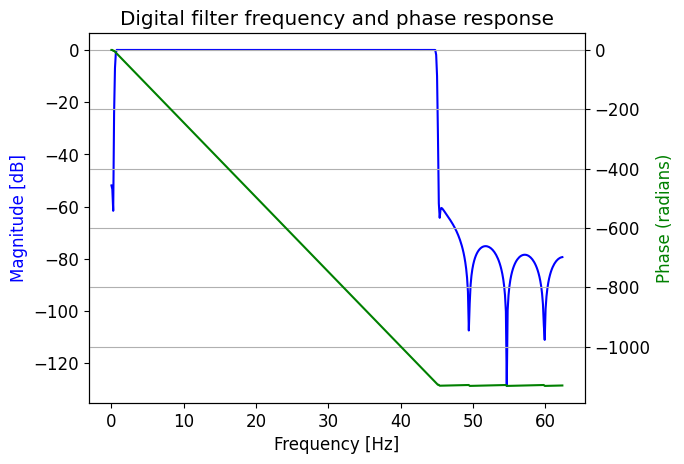

Frequência a retirar:  25.212838627746734


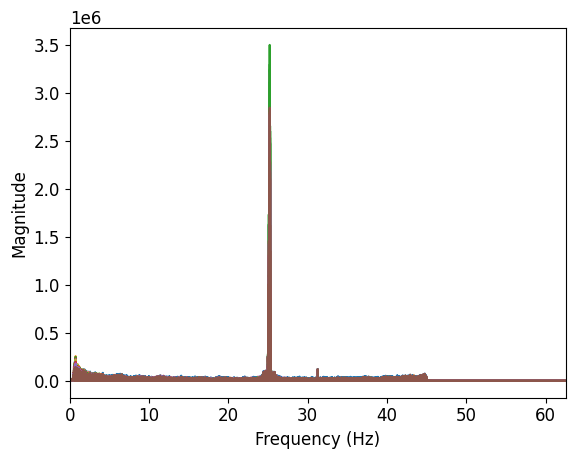

In [ ]:
from scipy.signal import filtfilt, firwin, freqz

# Design a band-pass FIR filter with a passband between 0.5 and 45 Hz
nyquist = fs/2
lowcut = 0.5
highcut = 45
numtaps = 1001 # Ordem
filt = firwin(numtaps, [lowcut/nyquist, highcut/nyquist], pass_zero=False)

# Plot the frequency response of the filter
w, h = freqz(filt) # The frequency response is returned as a tuple (w, h), where w is the array of frequencies and h is the array of complex (w: rad/samples)

# Create a single figure with two subplots

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency and phase response')
ax1.plot(w*fs/(2*np.pi), 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Magnitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax2 = ax1.twinx()
ax2.plot(w*fs/(2*np.pi), np.unwrap(np.angle(h)), 'g')
ax2.set_ylabel('Phase (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

# Apply the filter to the signal using filtfilt
y = filtfilt(filt, 1, miguel.iloc[:,0:-1], axis = 0)

# Compute the FFT of the signal
X = np.fft.fft(y,axis = 0)

# Compute the frequency vector
freqs = np.fft.fftfreq(len(X), 1/fs)

# Descobrir qual a componente exata de frequência de ruído
idx = np.argmax(X[:,0])
noise_freq = freqs[idx]
print("Frequência a retirar: ", noise_freq) 

# Plot the frequency spectrum
plt.plot(freqs, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim([0, fs/2])
plt.show()

## **Banco de frequências**

In [ ]:
min_freq = 4
max_freq = 40

n_bands = int((max_freq - min_freq)/2)

bands = []
f1 = 4
f2 = 8

for i in range(1,n_bands):
  bands.append([f1,f2])
  f1+=2
  f2+=2

print("---------------------------------------------")
n_samples, n_ch = np.shape(miguel.iloc[:,0:-1])
bankfiltered_eeg = np.zeros((len(bands), n_samples, n_ch))

start_time = time.time()
for count, band in enumerate(bands):

  print(f"Filtragem na banda de frequências: {band[0]} - {band[1]} Hz")

  lowcut = band[0]
  highcut = band[1]

  if band[0] == 22 or band[0] == 24:
    filt = firwin(numtaps, [lowcut/nyquist, (noise_freq-0.7)/nyquist, (noise_freq+0.7)/nyquist, highcut/nyquist], pass_zero=False)
    print(f"Retirar componente dos {noise_freq:.2f} Hz",)
  else:
    filt = firwin(numtaps, [lowcut/nyquist, highcut/nyquist], pass_zero=False)
  
  bankfiltered_eeg[count,:,:] = filtfilt(filt, 1, miguel.iloc[:,0:-1], axis = 0)

end_time = time.time()
print(f"Tempo de execução do banco de frequências: {end_time - start_time:.2f} (s)")
print("Tamanho da variável: ", np.shape(bankfiltered_eeg))
  

---------------------------------------------
Filtragem na banda de frequências: 4 - 8 Hz
Filtragem na banda de frequências: 6 - 10 Hz
Filtragem na banda de frequências: 8 - 12 Hz
Filtragem na banda de frequências: 10 - 14 Hz
Filtragem na banda de frequências: 12 - 16 Hz
Filtragem na banda de frequências: 14 - 18 Hz
Filtragem na banda de frequências: 16 - 20 Hz
Filtragem na banda de frequências: 18 - 22 Hz
Filtragem na banda de frequências: 20 - 24 Hz
Filtragem na banda de frequências: 22 - 26 Hz
Retirar componente dos 25.21 Hz
Filtragem na banda de frequências: 24 - 28 Hz
Retirar componente dos 25.21 Hz
Filtragem na banda de frequências: 26 - 30 Hz
Filtragem na banda de frequências: 28 - 32 Hz
Filtragem na banda de frequências: 30 - 34 Hz
Filtragem na banda de frequências: 32 - 36 Hz
Filtragem na banda de frequências: 34 - 38 Hz
Filtragem na banda de frequências: 36 - 40 Hz
Tempo de execução do banco de frequências: 96.46 (s)
Tamanho da variável:  (17, 436246, 16)


## **Segmentação (Foto-resistência)**

In [ ]:
def segmentation(pht_resistor, th, th2):
    
    
    last_low = True
    last_high = False
    

    falling_edges = []
    rising_edges = []

    for count, val in enumerate(pht_resistor):

        if val >= th and val <=th2: # Possible rising edge
            if last_low: # Found rising edge
                rising_edges.append(count)
            
            last_low = False
            last_high = True
        
        elif val <= th: # Possible falling edge
            if last_high: # Found falling edge
                falling_edges.append(count)

            last_low = True
            last_high = False

    return rising_edges, falling_edges

In [ ]:
pht_resistor = scipy.signal.medfilt( miguel.iloc[:,-1], 11 )
t_pht = np.linspace(0,len(pht_resistor), len(pht_resistor))
t_pht = (t_pht/fs)/60

figure(figsize=(400, 20))
plt.plot(t_pht, pht_resistor);
plt.title('Foto-resistência', fontsize = 130);
plt.yticks(np.arange(0, 260, 10));
plt.xticks(np.arange(0,58.4,0.2), fontsize = 30);
plt.xlabel('Tempo (min)');
plt.show()

In [ ]:
rest_rising, rest_falling = segmentation(pht_resistor, 230, 260)

dnt = 3.80
upt =  4.20

bf_rest_blocks = [] # bf de Bank Filter
bf_leftWrist_blocks = []
bf_rightWrist_blocks = []
bf_bothWrists_blocks = []
bf_bothFeet_blocks = []

for count, _ in enumerate(bands):

    eeg_data = bankfiltered_eeg[count,:,:]

    rest_blocks = []
    leftWrist_blocks = []
    rightWrist_blocks = []
    bothWrists_blocks = []
    bothFeet_blocks = []

    leftWrist_start = []
    leftWrist_stop = []

    rightWrist_start = []
    rightWrist_stop = []

    bothWrists_start = []
    bothWrists_stop = []

    bothFeet_start = []
    bothFeet_stop = []

    for i in range(len(rest_falling)):
        
        # Motor tasks

        if i>0 and i<len(rest_falling):

            pht = pht_resistor[rest_falling[i-1]:rest_rising[i]]
            motor_data = eeg_data[rest_falling[i-1]:rest_rising[i]]
            motor_block = len(motor_data)/fs

            if motor_block >= dnt and motor_block <= upt:

                # Left Fist

                if np.mean(pht) >= 190 and np.mean(pht) <= 210:
                    leftWrist_blocks.append(motor_data)
                    leftWrist_start.append(((rest_falling[i-1]/fs))/60)
                    leftWrist_stop.append(((rest_rising[i]/fs))/60)

                # Right Fist

                elif np.mean(pht) >= 80 and np.mean(pht) <= 110:
                    rightWrist_blocks.append(motor_data)
                    rightWrist_start.append(((rest_falling[i-1]/fs))/60)
                    rightWrist_stop.append(((rest_rising[i]/fs))/60)

                # Both Feet
            
                elif np.mean(pht) >= 35 and np.mean(pht) <= 60:
                    bothFeet_blocks.append(motor_data)
                    bothFeet_start.append(((rest_falling[i-1]/fs))/60)
                    bothFeet_stop.append(((rest_rising[i]/fs))/60)

                # Both Fists

                elif np.mean(pht) >= 0 and np.mean(pht) <= 30:
                    bothWrists_blocks.append(motor_data)
                    bothWrists_start.append(((rest_falling[i-1]/fs))/60)
                    bothWrists_stop.append(((rest_rising[i]/fs))/60)

        # Rest
        
        rest_data = eeg_data[rest_rising[i]:rest_falling[i]]
        restt_block = len(rest_data)/fs

        if restt_block >= dnt and restt_block <= upt:
            rest_blocks.append(rest_data)
    
    bf_rest_blocks.append(rest_blocks)
    bf_leftWrist_blocks.append(leftWrist_blocks)
    bf_rightWrist_blocks.append(rightWrist_blocks)
    bf_bothWrists_blocks.append(bothWrists_blocks)
    bf_bothFeet_blocks.append(bothFeet_blocks)


### Verificar segmentação

In [ ]:
figure(figsize=(400, 20))
plt.plot(t_pht, pht_resistor);
for x in range(len(leftWrist_start)):
    plt.axvline(x = leftWrist_start[x], color = 'r', linestyle = '--') 
    plt.axvline(x = leftWrist_stop[x], color = 'r', linestyle = ':')
for x in range(len(rightWrist_start)):
    plt.axvline(x = rightWrist_start[x], color = 'k', linestyle = '--') 
    plt.axvline(x = rightWrist_stop[x], color = 'k', linestyle = ':')
for x in range(len(bothWrists_start)):
    plt.axvline(x = bothWrists_start[x], color = 'y', linestyle = '--') 
    plt.axvline(x = bothWrists_stop[x], color = 'y', linestyle = ':')
for x in range(len(bothFeet_start)):
    plt.axvline(x = bothFeet_start[x], color = 'g', linestyle = '--') 
    plt.axvline(x = bothFeet_stop[x], color = 'g', linestyle = ':')
plt.title('Foto-resistência', fontsize = 130);
plt.yticks(np.arange(0, 260, 10));
plt.xticks(np.arange(0,58.4,0.2), fontsize = 30);
plt.xlabel('Tempo (min)');
plt.show()

## **Equalizar classes**

In [ ]:
print(np.shape(bf_rest_blocks))
print(np.shape(bf_leftWrist_blocks))
print(np.shape(bf_rightWrist_blocks))
print(np.shape(bf_bothWrists_blocks))
print(np.shape(bf_bothFeet_blocks))

(17, 359)
(17, 84)
(17, 88)
(17, 87)
(17, 87)


c:\Users\migue\anaconda3\envs\BCI\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [ ]:
'''bf_rest_blocks = bf_rest_blocks[0:-1,0:85]
bf_rightWrist_blocks = bf_rightWrist_blocks[:][0:85]
bf_bothWrists_blocks = bf_bothWrists_blocks[:][0:85]
bf_bothFeet_blocks = bf_bothFeet_blocks[:][0:85]'''
for count, _ in enumerate(bands):
    bf_rest_blocks[count] = bf_rest_blocks[count][0:84]
    bf_rightWrist_blocks[count] = bf_rightWrist_blocks[count][0:84]
    bf_bothWrists_blocks[count] = bf_bothWrists_blocks[count][0:84]
    bf_bothFeet_blocks[count] = bf_bothFeet_blocks[count][0:84]

print(np.shape(bf_rest_blocks))
print(np.shape(bf_leftWrist_blocks))
print(np.shape(bf_rightWrist_blocks))
print(np.shape(bf_bothWrists_blocks))
print(np.shape(bf_bothFeet_blocks))

(17, 84)
(17, 84)
(17, 84)
(17, 84)
(17, 84)


## **Train/Test split**

In [ ]:
def split_EEG(EEG, percent_train=0.80):
  
  _, n_trials = np.shape(EEG)
  n_train = round((n_trials) * percent_train)
  n_test = int(n_trials - n_train)

  print("Nº de trials: ", n_trials)
  print("Nº de trials para treinar (por classe): ", n_train)
  print("Nº de trials para teste (por classe): ", n_test)

  epochs_train = []
  epochs_test = []

  for band in range(len(bands)):
    epochs_train.append(EEG[band][:n_train])
    epochs_test.append(EEG[band][n_train:n_train+n_test])

  return epochs_train, epochs_test


train_bf_rest_blocks, test_bf_rest_blocks = split_EEG(bf_rest_blocks)
train_bf_leftWrist_blocks, test_bf_leftWrist_blocks = split_EEG(bf_leftWrist_blocks)
train_bf_rightWrist_blocks, test_bf_rightWrist_blocks = split_EEG(bf_rightWrist_blocks)
train_bf_bothWrists_blocks, test_bf_bothWrists_blocks = split_EEG(bf_bothWrists_blocks)
train_bf_bothFeet_blocks, test_bf_bothFeet_blocks = split_EEG(bf_bothFeet_blocks)

train_data = [train_bf_rest_blocks, train_bf_leftWrist_blocks, train_bf_rightWrist_blocks, train_bf_bothWrists_blocks, train_bf_bothFeet_blocks]
test_data = [test_bf_rest_blocks, test_bf_leftWrist_blocks, test_bf_rightWrist_blocks, test_bf_bothWrists_blocks, test_bf_bothFeet_blocks]

Nº de trials:  84
Nº de trials para treinar (por classe):  67
Nº de trials para teste (por classe):  17
Nº de trials:  84
Nº de trials para treinar (por classe):  67
Nº de trials para teste (por classe):  17
Nº de trials:  84
Nº de trials para treinar (por classe):  67
Nº de trials para teste (por classe):  17
Nº de trials:  84
Nº de trials para treinar (por classe):  67
Nº de trials para teste (por classe):  17
Nº de trials:  84
Nº de trials para treinar (por classe):  67
Nº de trials para teste (por classe):  17


In [ ]:
np.squeeze(np.shape(train_data[0][0][0:4]))

array(4)

## **Common Spatial Patterns (CSP)**

In [ ]:
from numpy import linalg
from scipy.linalg import sqrtm
from scipy.linalg import inv

# Matrizes das covariâncias:

def covariances(epoched_data):

    n_trials = len(epoched_data)
    _, n_channels = np.shape(epoched_data[0])
    Trials_convs = np.zeros((n_trials, n_channels, n_channels))

  # Pré alocação da variável 'convs'. Isto é boa prática fazer antes de qualquer ciclo para reduzir o tempo de processamento pré-alocando o array na memória.
  
    Xc = epoched_data
    for trial in range(n_trials):
      Trials_convs[trial,:,:] = (Xc[trial].T @ Xc[trial]) / (np.trace (Xc[trial].T @ Xc[trial])) # Cálculo das Covariâncias com normalização aprtir do traço da matriz
    Mean_convs = np.mean(Trials_convs, axis = 0) # Média dos trials da mesma classe
    
    return Mean_convs

# Whitening da matriz, ou seja, transformação que permite com que a matriz tenha a mesma covariância da matriz Identidade (I), 
# logo covariâncias de 0 entre todos os pares:

def decompose_cov(avg_cov):

    λ, V = np.linalg.eig(avg_cov) # λ são o eigenvalues e V os eigenvectors
    λ_desc = np.sort(λ)[::-1] # :: Ordem inversa
    idx_desc = np.argsort(λ)[::-1] 
    V_desc = V[:, idx_desc] 
    λ_desc = np.diag(λ_desc) 
    
    return λ_desc, V_desc

def whitening(λ_desc, V_desc):

    λ_desc_sqr = sqrtm(inv(λ_desc))
    P = (λ_desc_sqr) @ (V_desc.T)
    
    return P

# Matriz S que contém os eigenvectors que maximizam a variância do EEG (freq) numa classe e minimiza noutra:

def compute_S(avg_Cov, white):
    
    S = white @ avg_Cov @ white.T
 
    return S

def decompose_S(S_one_class, order='d'):
  
    λ, B = np.linalg.eig(S_one_class)
    
    if order == 'a': # ascending
        idx = λ.argsort() 
    elif order == 'd': # descending
        idx = λ.argsort()[::-1] 
    else:
        print('Ordem errada de input.')
    
    λ = λ[idx]
    B = B[:, idx]
    
    return B, λ 

# Filtro espacial (Matriz de projeção):

  # B_one_class = np.zeros( (len(classes),len(subject_epochs.get_channel_types())) )
  # B_the_rest_classes = np.zeros( (len(classes),len(subject_epochs.get_channel_types())) )

def spatial_filter(B, P):

    return (B.T @ P)

def spatially_filter_EEG(W, EEG, n_comp):

    Z = []
    
    W = np.delete(W, np.s_[n_comp:-n_comp:], 0)

    for trial in range(len(EEG)):
      Z.append( W @ np.squeeze(EEG[trial].T) )
    

    return Z

def feat_vector(Z):
    
    feat = []
    
    for i in range(len(Z)):
        var = np.var(Z[i], ddof=1, axis=1)
        varsum = np.sum(var)
        
        feat.append(np.log10(var/varsum))
        
    return feat

In [ ]:
classes = {"rest/block": 1, "left_fist/block": 2, "right_fist/block": 3, "both_fists/block": 4,"both_feet/block": 5}
print(classes)

{'rest/block': 1, 'left_fist/block': 2, 'right_fist/block': 3, 'both_fists/block': 4, 'both_feet/block': 5}


In [ ]:
np.shape(train_data)

(5, 17, 67)

In [ ]:
all_comp = np.arange(1,9) # De 1 a 8 # -> 16 elétrodos

perComp_train_feat_vect = []
perComp_test_feat_vect =[]

perComp_W = np.zeros((len(all_comp),len(bands), len(classes), n_ch, n_ch))

for _, n_comp in enumerate(all_comp):

    print("----------------------")
    print("Compomentes do CSP: ", n_comp)

    start_time = time.time()

    perBand_train_feat_vect = []
    perBand_test_feat_vect = [] 

    perBand_W = np.zeros((len(bands), len(classes), n_ch, n_ch))

    for band in range(len(bands)):

        rest_convs = covariances(train_bf_rest_blocks[band])
        leftWrist_convs = covariances(train_bf_leftWrist_blocks[band])
        rightWrist_convs = covariances(train_bf_rightWrist_blocks[band])
        bothWrists_convs = covariances(train_bf_bothWrists_blocks[band])
        bothFeet_convs = covariances(train_bf_bothFeet_blocks[band])

        all_Covs =  [rest_convs, leftWrist_convs, rightWrist_convs, bothWrists_convs, bothFeet_convs]
        Avg_convs = np.sum(all_Covs, axis = 0)
        λ_desc, V_desc = decompose_cov(Avg_convs)
        P = whitening(λ_desc, V_desc)
        all_Covs =  [rest_convs, leftWrist_convs, rightWrist_convs, bothWrists_convs, bothFeet_convs] 

        train_feat_vect = []
        test_feat_vect = []

        W = np.zeros((len(classes), n_ch, n_ch))

        for _, c_id in classes.items():
            
            one = compute_S(all_Covs[c_id-1], P)
            the_rest = compute_S(  np.sum(all_Covs[:(c_id-1)], axis = 0) + np.sum(all_Covs[c_id:], axis = 0)  , P)

            λ_one, B_one = decompose_S(one, 'd')
            λ_the_rest, B_the_rest = decompose_S(the_rest, 'a')
        
            W[c_id-1,:,:] = spatial_filter(λ_one, P)

            Z_aux_train = spatially_filter_EEG(W[c_id-1,:,:], train_data[c_id-1][band], n_comp)
            train_feat_vect.append(feat_vector(Z_aux_train))

            Z_aux_test = spatially_filter_EEG(W[c_id-1,:,:], test_data[c_id-1][band], n_comp)
            test_feat_vect.append(feat_vector(Z_aux_test)) 

        perBand_W[band,:,:,:] = W

        perBand_train_feat_vect.append(train_feat_vect)
        perBand_test_feat_vect.append(test_feat_vect)

    perComp_W[n_comp-1,:,:,:,:] = perBand_W 

    end_time = time.time()
    print(f"Tempo de execução: {end_time - start_time:.2f} (s)")

    perComp_train_feat_vect.append(perBand_train_feat_vect)
    perComp_test_feat_vect.append(perBand_test_feat_vect)

----------------------
Compomentes do CSP:  1
Tempo de execução: 2.00 (s)
----------------------
Compomentes do CSP:  2
Tempo de execução: 1.32 (s)
----------------------
Compomentes do CSP:  3
Tempo de execução: 1.52 (s)
----------------------
Compomentes do CSP:  4
Tempo de execução: 1.79 (s)
----------------------
Compomentes do CSP:  5
Tempo de execução: 1.90 (s)
----------------------
Compomentes do CSP:  6
Tempo de execução: 2.09 (s)
----------------------
Compomentes do CSP:  7
Tempo de execução: 2.20 (s)
----------------------
Compomentes do CSP:  8
Tempo de execução: 2.14 (s)


## **Seleção da banda mais discriminativa**

### **Concatenar os dados das várias bandas de frequência horizontalmente (Por colunas)**

In [ ]:
conc_all_comp_feat_classes_train = []
conc_all_comp_feat_classes_test = []
for count, n_conp in enumerate(all_comp):
    aux2_train = []
    aux2_test = []
    for _, c_id in classes.items():
      for band in range(1,len(bands)):
        if band == 1:
          aux1_train = np.hstack((perComp_train_feat_vect[count][band-1][c_id-1], perComp_train_feat_vect[count][band][c_id-1])) #[:,0:n_comp]
          aux1_test = np.hstack((perComp_test_feat_vect[count][band-1][c_id-1], perComp_test_feat_vect[count][band][c_id-1])) #[:,0:n_comp]
        else:
          aux1_train = np.hstack((aux1_train,perComp_train_feat_vect[count][band][c_id-1])) #[:,0:n_comp]
          aux1_test = np.hstack((aux1_test,perComp_test_feat_vect[count][band][c_id-1])) #[:,0:n_comp]
      aux2_train.append(aux1_train)
      aux2_test.append(aux1_test)
    conc_all_comp_feat_classes_train.append(aux2_train)
    conc_all_comp_feat_classes_test.append(aux2_test)

In [ ]:
_, train_trials, _ = np.shape(conc_all_comp_feat_classes_train[0])
_, test_trials, _ = np.shape(conc_all_comp_feat_classes_test[0])

y_train = []
y_test = []

for c in range(len(classes)):
    y_train.append((np.ones(train_trials) * c))
    y_test.append((np.ones(test_trials) * c))

print(np.shape(np.array(y_train)))
print(np.shape(np.array(y_test)))

(5, 67)
(5, 17)


### **Mutual Based Information (MI)**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

comp_fselect_train = []
comp_fselect_test = []
mi_idx = []

k_feat = 34

for count, n_comp in enumerate(all_comp):
  for c_id in range(1,len(classes)):
    if (c_id) == 1:
      X_train = np.vstack((conc_all_comp_feat_classes_train[count][c_id-1],conc_all_comp_feat_classes_train[count][c_id]))
      X_test = np.vstack((conc_all_comp_feat_classes_test[count][c_id-1],conc_all_comp_feat_classes_test[count][c_id]))
    else:
      X_train = np.vstack((X_train, conc_all_comp_feat_classes_train[count][c_id]))
      X_test = np.vstack((X_test, conc_all_comp_feat_classes_test[count][c_id]))

  y_train = np.array(y_train).reshape(-1,1)

  train = np.concatenate((X_train,y_train), axis = 1)
  np.random.shuffle(train)
  
  _, n = np.shape(train) 
  subj_feat = SelectKBest(mutual_info_classif, k = k_feat).fit(train[:,0:(n-1)], train[:,(n-1)])
  mi_idx.append(subj_feat.get_support())

  comp_fselect_train.append(np.concatenate((X_train[:,mi_idx[count]], y_train.reshape(-1,1)), axis = 1))
  comp_fselect_test.append(X_test[:,mi_idx[count]])

## **Classificação**

### **SVM - Treino**

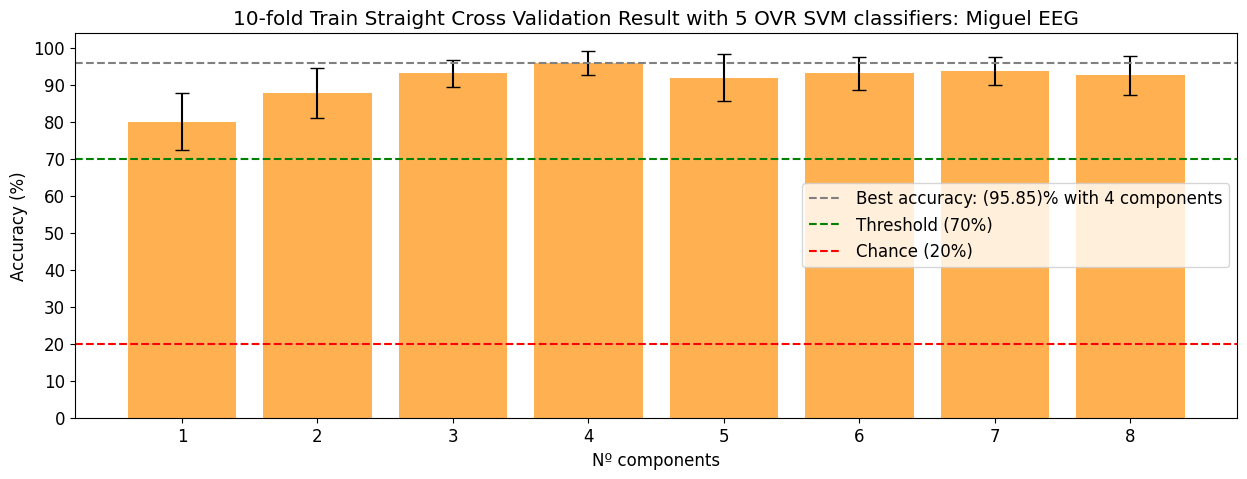

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier as OVR

clf = OVR(SVC(kernel='rbf'))
kfold = 10

cross_val_scores = np.zeros((len(all_comp),2))

test_labels=[]
subj_test=[]

for count, n_comp in enumerate(all_comp):

  X_train = comp_fselect_train[count][:,0:k_feat]
  X_test = comp_fselect_test[count]

  y_train = comp_fselect_train[count][:,k_feat].reshape(-1,1)
  y_test = np.array(y_test).reshape(-1,1)

  train = np.concatenate((X_train,y_train), axis = 1)
  test = np.concatenate((X_test,y_test), axis = 1)

  np.random.shuffle(train) # Randomiza a ordem
  np.random.shuffle(test)
    
  subj_test.append(test)

  # Perform cross-validation on train data with LDA classifier (Tuning hyperparameters)
  scores = cross_val_score(clf, train[:,0:k_feat], train[:,k_feat], cv=kfold)

  # Fit the LDA classifier on the entire train dataset (Model training)
  clf.fit(train[:,0:k_feat], train[:,k_feat])

  # Predict the target classes for test dataset
  test_labels.append(clf.predict(test[:,0:k_feat]))
  
  cross_val_scores[count,0] = (scores.mean() * 100)
  cross_val_scores[count,1] = (scores.std() * 100)

idx = np.argmax(cross_val_scores[:,0]) # Indice da melhor acuracia

fig, ax = plt.subplots(figsize=(15, 5))
plt.rcParams.update({'font.size': 12})
ax.set_title('Accuracy (%)')
ax.bar(np.arange(1, len(all_comp)+1), cross_val_scores[:,0], color="#ffb152", yerr=cross_val_scores[:,1], capsize=5)
ax.axhline(y=cross_val_scores[idx,0], color='grey', linestyle='--', label = f'Best accuracy: ({cross_val_scores[idx,0]:.2f})% with {all_comp[idx]} components')
ax.axhline(y=70, color='green', linestyle='--', label = 'Threshold (70%)')
ax.axhline(y=20, color='red', linestyle='--', label = 'Chance (20%)')
ax.set(xticks=np.arange(1, len(all_comp)+1), xlabel='Nº components', 
       yticks=np.arange(0, 101, step=10), ylabel='Accuracy (%)',
       title=f'{kfold}-fold Train Straight Cross Validation Result with 5 OVR SVM classifiers: Miguel EEG');
ax.legend();


### **SVM - Teste**

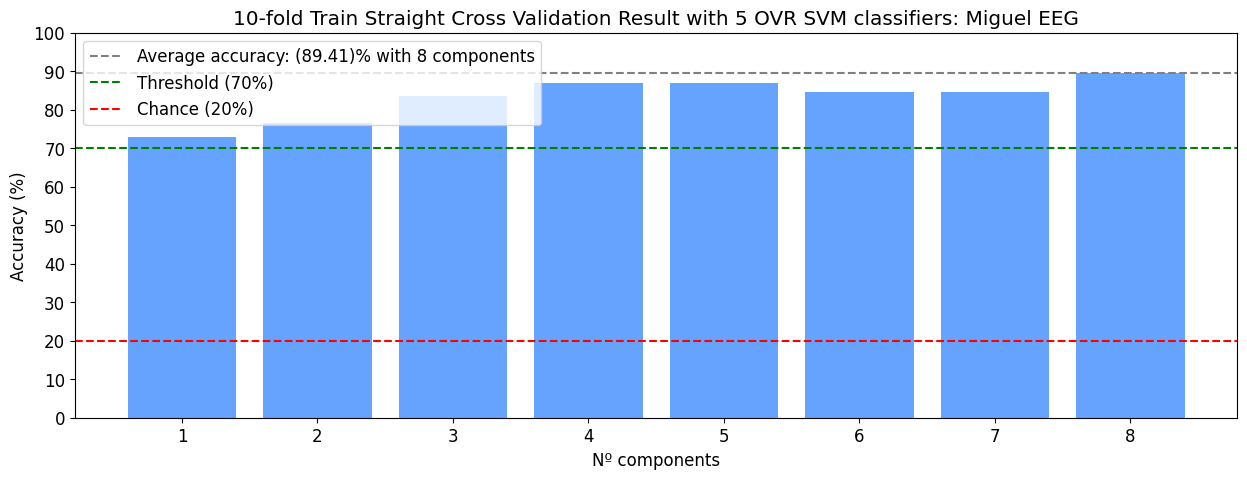

In [ ]:
from sklearn.metrics import accuracy_score

all_acc_comp = np.zeros((len(all_comp)))


for count, n_comp in enumerate(all_comp):

  all_acc_comp[count] = accuracy_score(subj_test[count][:,k_feat],test_labels[count]) * 100

idx = np.argmax(all_acc_comp) # Indice da melhor acuracia

fig, ax = plt.subplots(figsize=(15, 5))
plt.rcParams.update({'font.size': 12})
ax.set_title('Accuracy (%)')
ax.bar(np.arange(1, len(all_comp)+1), all_acc_comp, color="#66a3ff", capsize=5)
ax.axhline(y=all_acc_comp[idx], color='grey', linestyle='--', label = f'Average accuracy: ({all_acc_comp[idx]:.2f})% with {all_comp[idx]} components')
ax.axhline(y=70, color='green', linestyle='--', label = 'Threshold (70%)')
ax.axhline(y=20, color='red', linestyle='--', label = 'Chance (20%)')
ax.set(xticks=np.arange(1, len(all_comp)+1), xlabel='Nº components', 
       yticks=np.arange(0, 109, step=10), ylabel='Accuracy (%)',
       title=f'{kfold}-fold Train Straight Cross Validation Result with 5 OVR SVM classifiers: Miguel EEG');
ax.legend();

##  **Bandas mais discriminativas**

In [ ]:
print(len(mi_idx[idx]))
print(mi_idx[idx])

272
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False  True  True  True False False False
 False False False False False False False False False False  True  True
 False False False False False False False False False False False False
 False False  True  True False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False  True  True False  True Fals

In [ ]:
n_comp = idx + 1

n_bands = len(bands)
n_feat = (idx+1)*2

tf = np.zeros(n_bands)
cont = np.ones(n_feat)

for i in range(n_bands):
    tf[i] = (np.sum(cont[mi_idx[idx][i*n_feat:i*n_feat+n_feat]]))

band_cont = [int(i) for i in tf]   
print(band_cont)

[1, 0, 0, 1, 2, 3, 2, 0, 1, 2, 5, 8, 2, 2, 1, 1, 3]


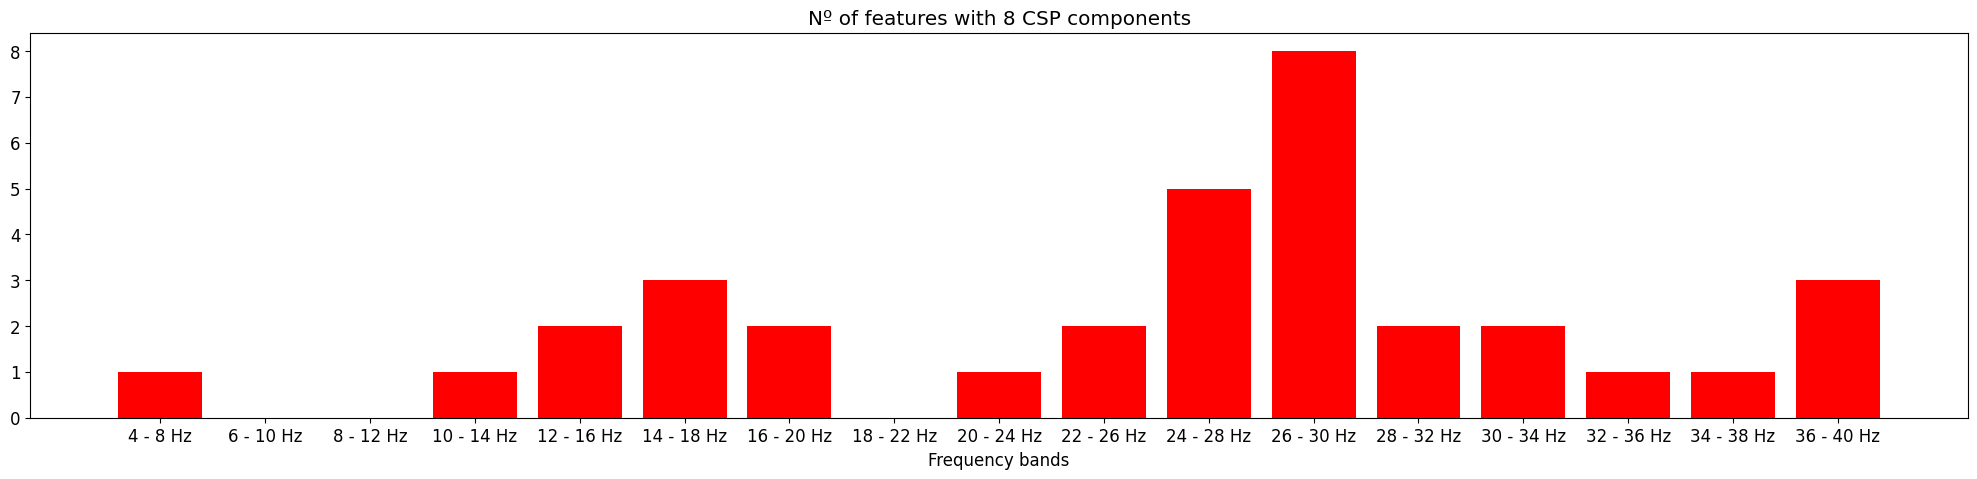

In [ ]:
customlb = []
for i, band in enumerate(bands):
    customlb.append(str(band[0]) + " - " + str(band[1]) + " Hz")

fig, ax = plt.subplots(figsize=(25, 5))
plt.rcParams.update({'font.size': 12})
ax.set_title(f'Nº of features with {n_comp} CSP components')
ax.bar(np.arange(1, n_bands+1), band_cont, color="red", capsize=5)
ax.set(xticks=np.arange(1, n_bands+1), xlabel='Frequency bands', 
       yticks=np.arange(0, max(band_cont)+1, step=1))
ax.set_xticklabels(customlb);